<a href="https://colab.research.google.com/github/ralsouza/study_case_eda_bike_taxi_nyc/blob/master/notebooks/02_eda_bike_taxis_nyc_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load saved data

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/04_study_case_eda_bike_taxi_nyc/data/taxis_bikes_nycity_changed_v1.csv')

# Check loaded data

In [3]:
data.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


the setting index is gone!!!

In [5]:
data.dtypes

Data          object
Distancia    float64
Tempo         object
dtype: object

The column Data returned as `object` data type.

# Load saved data again and doing some transformations
We will use the command to convert the date column to date type.


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/04_study_case_eda_bike_taxi_nyc/data/taxis_bikes_nycity_changed_v1.csv'
                  ,parse_dates=['Data'])

In [20]:
data.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [21]:
data.dtypes # Now yes

Data         datetime64[ns]
Distancia           float64
Tempo                object
dtype: object

In [0]:
# Changing the column names
data.columns = ['Date','Distance','Time']

In [23]:
# Check the data
data.head()

,Date,Distance,Time
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [0]:
# Setting the Date column as index again
data.set_index('Date', inplace=True)

In [26]:
# Check modified data
data.head(10)

,Distance,Time
Date,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
2015-08-08,3.40,NaN
2015-08-09,2.50,NaN
2015-08-10,3.36,0:28:37
2015-08-11,1.67,0:13:07


# Visualizing data

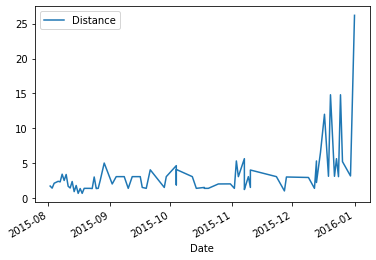

In [27]:
data.plot()

# Making some transformations

In [0]:
# Making a function to convert the Time to seconds
def calc_secs(time):
  if time is np.nan:
    return np.nan
  hrs, mins, seconds = str(time).split(':')
  seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
  return seconds

In [0]:
# Apply this function to a new column
data['seconds'] = data.Time.map(calc_secs)

In [30]:
data.head(10)

,Distance,Time,seconds
Date,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0
